# Device Enumeration and Device Configuration

In [58]:
# these four imports will provide most of the functionality required in 
# to start working with basler cameras
# pypylon 
import pypylon.pylon as py
# plotting for graphs and display of image
import matplotlib.pyplot as plt
# linear algebra and basic math on image matrices
import numpy as np
# OpenCV for image processing functions
import cv2

In [59]:
# get instance of the pylon TransportLayerFactory
tlf = py.TlFactory.GetInstance()

In [60]:
# all pypylon objects are instances of SWIG wrappers around the underlying pylon c++ types
tlf

<pypylon.pylon.TlFactory; proxy of <Swig Object of type 'Pylon::CTlFactory *' at 0x000002E85E156CD0> >

In [61]:
devices = tlf.EnumerateDevices()

In [62]:
# list of pylon Device 
devices

(<pypylon.pylon.DeviceInfo; proxy of <Swig Object of type 'Pylon::CDeviceInfo *' at 0x000002E8586076C0> >,)

In [63]:
for d in devices:
    print(d.GetModelName(), d.GetSerialNumber())

a2A1920-160ucPRO 40648144


In [64]:
# the active camera will be an InstantCamera based on a device
# created with the corresponding DeviceInfo
# this can be from a list of previously enumerated 
cam = py.InstantCamera(tlf.CreateDevice(devices[0]))

In [65]:
# or with the helper method to get the FirstDevice from an enumeration
cam = py.InstantCamera(tlf.CreateFirstDevice())

In [66]:
cam

<pypylon.pylon.InstantCamera; proxy of <Swig Object of type 'Pylon::CInstantCamera *' at 0x000002E85E156CA0> >

In [67]:
# the features of the device are only accessable after Opening the device
cam.Open()

# Features and their available attributes and functions

pylon / genicam features are of the types:

* Float
* Integer
* Bool
* Command
* String

If there are multiple instances of a features e.g. TriggerSource for each possible Trigger on a device e.g. FrameStart/LineStart/FrameBurst ....:
* Selectors are used to first select the instance e.g. FrameStart and then write to the feature


In [68]:
# Float
# the node
cam.Gain

<pypylon.genicam.IFloat; proxy of <Swig Object of type 'GENAPI_NAMESPACE::IFloat *' at 0x000002E85E157090> >

In [69]:
# Float 
# the value
cam.Gain.GetValue()

0.0

In [70]:
# abbrev get value
cam.Gain.Value

0.0

In [71]:
# set the value
cam.Gain.SetValue(15)

In [72]:
# abbrev set value
cam.Gain = 12.1

C:\Users\Bas_K\AppData\Local\Temp\ipykernel_32288\1565815661.py:2: DeprecationWarning: Setting a feature value by direct assignment is deprecated. Use <nodemap>.Gain.Value = 12.1
  cam.Gain = 12.1


In [73]:
# the value has been updated
cam.Gain.Value

12.100011992063852

In [74]:
cam.Gain = 20

C:\Users\Bas_K\AppData\Local\Temp\ipykernel_32288\4163969725.py:1: DeprecationWarning: Setting a feature value by direct assignment is deprecated. Use <nodemap>.Gain.Value = 20
  cam.Gain = 20


In [75]:
# Enumeration ... all values:
cam.TriggerSelector.Symbolics

('FrameBurstStart',
 'FrameBurstEnd',
 'FrameBurstActive',
 'FrameStart',
 'FrameEnd',
 'FrameActive',
 'ExposureStart',
 'ExposureEnd',
 'ExposureActive')

In [76]:
# set the value
cam.TriggerSelector = "FrameStart"
cam.LineSelector.SetValue("Line2")

C:\Users\Bas_K\AppData\Local\Temp\ipykernel_32288\2183857246.py:2: DeprecationWarning: Setting a feature value by direct assignment is deprecated. Use <nodemap>.TriggerSelector.Value = FrameStart
  cam.TriggerSelector = "FrameStart"


In [77]:
# selector handling:
# first set selector than the dependent value:
cam.TriggerSelector = "FrameStart"
cam.TriggerSource = "Line1"

C:\Users\Bas_K\AppData\Local\Temp\ipykernel_32288\2032084399.py:3: DeprecationWarning: Setting a feature value by direct assignment is deprecated. Use <nodemap>.TriggerSelector.Value = FrameStart
  cam.TriggerSelector = "FrameStart"
C:\Users\Bas_K\AppData\Local\Temp\ipykernel_32288\2032084399.py:4: DeprecationWarning: Setting a feature value by direct assignment is deprecated. Use <nodemap>.TriggerSource.Value = Line1
  cam.TriggerSource = "Line1"


In [78]:
# reset to power on defaults
cam.UserSetSelector = cam.UserSetDefault.Value
cam.UserSetLoad.Execute()

C:\Users\Bas_K\AppData\Local\Temp\ipykernel_32288\118905204.py:2: DeprecationWarning: Setting a feature value by direct assignment is deprecated. Use <nodemap>.UserSetSelector.Value = Default
  cam.UserSetSelector = cam.UserSetDefault.Value


In [79]:
cam.PixelFormat.Symbolics

('Mono8',
 'Mono10',
 'Mono10p',
 'Mono12',
 'Mono12p',
 'RGB8',
 'BGR8',
 'YCbCr422_8',
 'BayerRG8',
 'BayerRG10',
 'BayerRG10p',
 'BayerRG12',
 'BayerRG12p')

In [80]:
cam.PixelFormat = "RGB8"
# like above, alternative is the long form
cam.PixelFormat.SetValue("RGB8")

C:\Users\Bas_K\AppData\Local\Temp\ipykernel_32288\2693186627.py:1: DeprecationWarning: Setting a feature value by direct assignment is deprecated. Use <nodemap>.PixelFormat.Value = RGB8
  cam.PixelFormat = "RGB8"


In [81]:
# grab one image with a timeout of 1s
# returns a GrabResult, which is the image plus metadata
res = cam.GrabOne(1000)

In [82]:
# the raw memory of the image
res.GetBuffer()[:100]

bytearray(b')+\n.+\x13*%\x15\'"\x16% \x17\'#\x18)%\x16*&\x13,*\x17&*\x14$)\x16)(\x1a(&\x18\'$\x16))\x1d)(\x1b+)\x1b\'\'\x16*(\x1a.)\x184/\x1c40\x1c10\x1d&/\x18*1\x1b.*\x16+%\x12$!\x10\x1f\x1c\n \x1c\n" \x0c\x1d \x06\x1b!\x10\x19')

# automatic conversion to ndarray with the Array call

In [83]:
# full method call
img = res.GetArray()
# abbrev
img = res.Array

In [84]:
res.GetArray().shape

(1200, 1920, 3)

In [85]:
img.shape

(1200, 1920, 3)

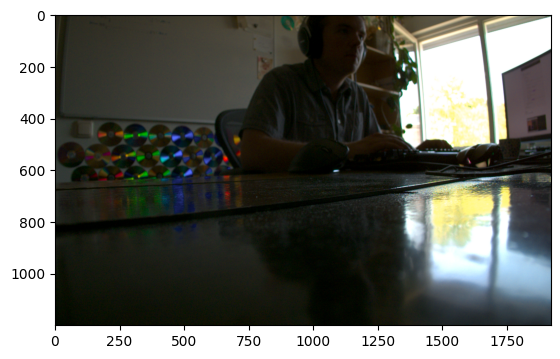

In [86]:
plt.imshow(img)

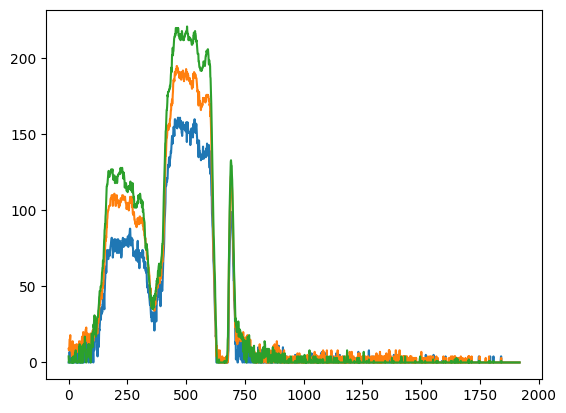

In [30]:
plt.plot(img[1000,:])

In [87]:
cam.Close()

In [37]:
img[1000,:].shape

(1920, 3)